## Import the library

In [3]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data=pd.read_csv("boston_housing1.csv")
data

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [5]:
data.dtypes

Unnamed: 0      int64
CRIM          float64
ZN            float64
INDUS         float64
CHAS          float64
NOX           float64
RM            float64
AGE           float64
DIS           float64
RAD           float64
TAX           float64
PTRATIO       float64
B             float64
LSTAT         float64
MEDV          float64
dtype: object

## Exploratory Data Analysis (EDA)

In [6]:
# Finding out the correlation between the features
corr = data.corr()
corr.shape

(15, 15)

<Axes: >

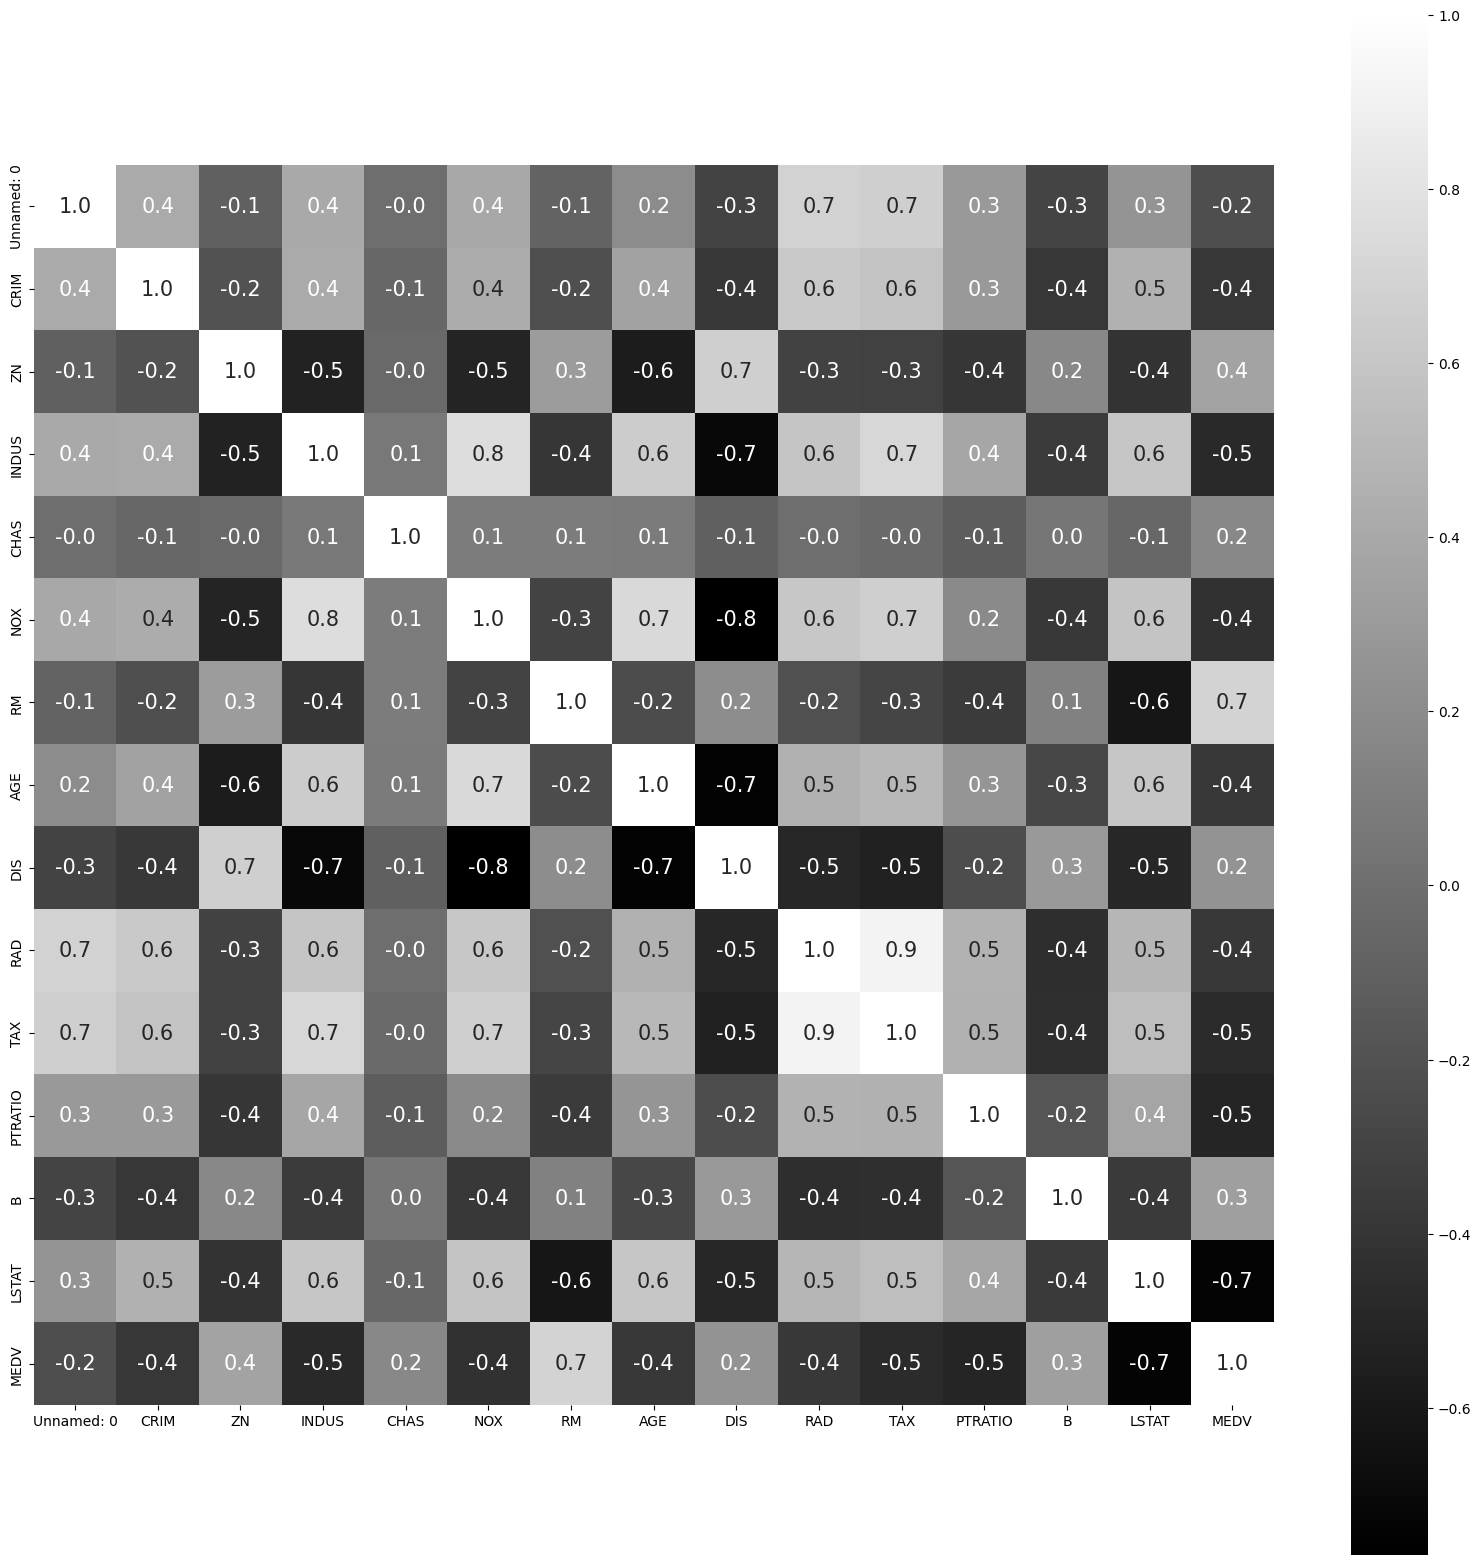

In [7]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='gray')

## Data Preprocessing

In [8]:
X =data.drop(['MEDV'], axis = 1)# data['area']#
y = data['MEDV']

In [9]:
X

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [10]:
X.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [11]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [12]:
y.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [13]:
# Splitting to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [14]:
from sklearn.preprocessing import MinMaxScaler
# Instantiate the scaler and fit to training dataset, X_train
scaler = MinMaxScaler()
scaler.fit(X_train)

# Replace unscaled values with scaled values
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Building the Neural Network Model

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [31]:
model = Sequential()
model.add(Dense(64, input_dim =14, activation = 'relu'))
model.add(Dropout(0.15))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(40, activation = 'relu'))
model.add(Dropout(0.15))
model.add(Dense(54, activation = 'relu'))
model.add(Dropout(0.18))
model.add(Dense(1))

In [32]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse', 'mae'])

In [33]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=200)

Epoch 1/200
9/9 [==============================] - 1s 24ms/step - loss: 541.4563 - mse: 541.4563 - mae: 21.6060 - val_loss: 550.1382 - val_mse: 550.1382 - val_mae: 21.6843
Epoch 2/200
9/9 [==============================] - 0s 6ms/step - loss: 498.7060 - mse: 498.7060 - mae: 20.5410 - val_loss: 487.2310 - val_mse: 487.2310 - val_mae: 20.1511
Epoch 3/200
9/9 [==============================] - 0s 5ms/step - loss: 412.0106 - mse: 412.0106 - mae: 18.1812 - val_loss: 363.3862 - val_mse: 363.3862 - val_mae: 16.7161
Epoch 4/200
9/9 [==============================] - 0s 4ms/step - loss: 265.1842 - mse: 265.1842 - mae: 13.8007 - val_loss: 175.1373 - val_mse: 175.1373 - val_mae: 10.6472
Epoch 5/200
9/9 [==============================] - 0s 6ms/step - loss: 141.2202 - mse: 141.2202 - mae: 9.2871 - val_loss: 110.0183 - val_mse: 110.0183 - val_mae: 7.9790
Epoch 6/200
9/9 [==============================] - 0s 4ms/step - loss: 143.7056 - mse: 143.7056 - mae: 9.5048 - val_loss: 94.2171 - val_mse: 94.21

## Model Evaluation and Visualization

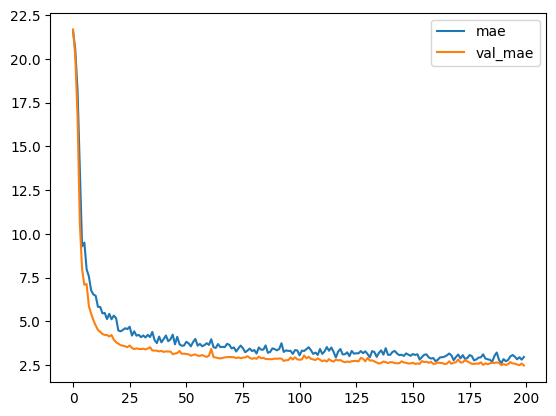

In [34]:
import matplotlib.pyplot as plt

#plot the loss and validation loss of the dataset
plt.plot(history.history['mae'], label='mae')
plt.plot(history.history['val_mae'], label='val_mae')

plt.legend()

In [35]:
scores = model.evaluate(X_test, y_test, verbose = 0)

print('Mean Squared Error : ', scores[1])
print('Mean Absolute Error : ', scores[2])

Mean Squared Error :  16.929866790771484
Mean Absolute Error :  2.6347992420196533


In [36]:
Y_pred = model.predict(X_test)
Y_pred

5/5 [==============================] - 0s 2ms/step


array([[15.1454525],
       [22.813862 ],
       [19.02201  ],
       [16.286345 ],
       [41.230564 ],
       [24.70319  ],
       [31.388113 ],
       [19.502264 ],
       [14.853162 ],
       [16.831526 ],
       [26.34538  ],
       [24.61888  ],
       [17.854015 ],
       [35.131096 ],
       [19.40579  ],
       [12.339134 ],
       [19.355127 ],
       [12.110955 ],
       [10.768292 ],
       [14.229036 ],
       [ 8.030193 ],
       [16.269003 ],
       [18.931337 ],
       [20.57414  ],
       [17.542765 ],
       [18.719912 ],
       [16.187769 ],
       [14.279974 ],
       [20.699995 ],
       [17.023125 ],
       [12.284115 ],
       [22.777536 ],
       [31.156925 ],
       [20.505264 ],
       [15.6029215],
       [16.664213 ],
       [31.721731 ],
       [41.665215 ],
       [21.7441   ],
       [24.139097 ],
       [38.324413 ],
       [31.865381 ],
       [15.958779 ],
       [30.84158  ],
       [31.186453 ],
       [21.949024 ],
       [43.963524 ],
       [17.81

In [37]:
from sklearn.metrics import r2_score

print('r2 score: ', r2_score(y_test,Y_pred))

r2 score:  0.8378677037318989


5/5 [==============================] - 0s 2ms/step


[]

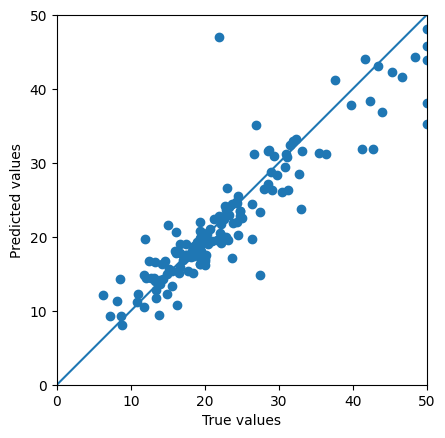

In [38]:
Y_pred = model.predict(X_test)

a = plt.axes(aspect='equal')

plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.xlim([0, 50])
plt.ylim([0, 50])
plt.plot([0, 50], [0,50])
plt.scatter(y_test,Y_pred)
plt.plot()

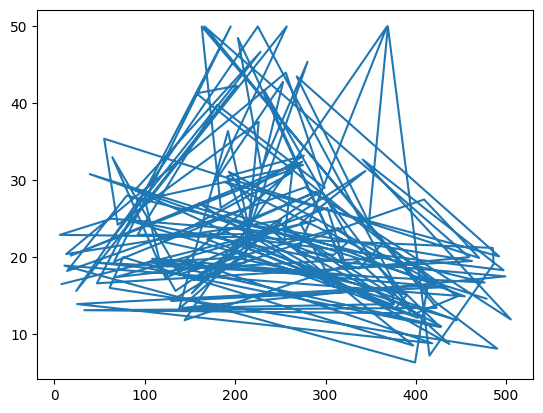

In [39]:
plt.plot(y_test)


array([[15.1454525],
       [22.813862 ],
       [19.02201  ],
       [16.286345 ],
       [41.230564 ],
       [24.70319  ],
       [31.388113 ],
       [19.502264 ],
       [14.853162 ],
       [16.831526 ],
       [26.34538  ],
       [24.61888  ],
       [17.854015 ],
       [35.131096 ],
       [19.40579  ],
       [12.339134 ],
       [19.355127 ],
       [12.110955 ],
       [10.768292 ],
       [14.229036 ],
       [ 8.030193 ],
       [16.269003 ],
       [18.931337 ],
       [20.57414  ],
       [17.542765 ],
       [18.719912 ],
       [16.187769 ],
       [14.279974 ],
       [20.699995 ],
       [17.023125 ],
       [12.284115 ],
       [22.777536 ],
       [31.156925 ],
       [20.505264 ],
       [15.6029215],
       [16.664213 ],
       [31.721731 ],
       [41.665215 ],
       [21.7441   ],
       [24.139097 ],
       [38.324413 ],
       [31.865381 ],
       [15.958779 ],
       [30.84158  ],
       [31.186453 ],
       [21.949024 ],
       [43.963524 ],
       [17.81

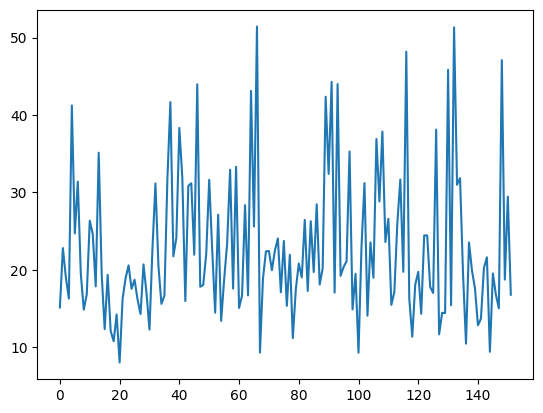

In [40]:
plt.plot(Y_pred)
Y_pred

In [41]:
print(Y_pred[:5])
print(y_test[:5])
y_test.head()

[[15.1454525]
 [22.813862 ]
 [19.02201  ]
 [16.286345 ]
 [41.230564 ]]
8      16.5
289    24.8
68     17.4
211    19.3
226    37.6
Name: MEDV, dtype: float64


8      16.5
289    24.8
68     17.4
211    19.3
226    37.6
Name: MEDV, dtype: float64

## Linear Regression

In [42]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

In [43]:
# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets
lm.fit(X_train, y_train)

LinearRegression()

In [44]:
# Value of y intercept
lm.intercept_

27.637914578957236

In [45]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,Unnamed: 0,-1.120593
1,CRIM,-10.979335
2,ZN,5.750192
3,INDUS,-0.234247
4,CHAS,4.683688
5,NOX,-6.865758
6,RM,16.063256
7,AGE,-0.569172
8,DIS,-17.198256
9,RAD,7.919327


In [46]:
# Model prediction on train data
y_pred = lm.predict(X_train)

## Model Evaluation and Visualization

In [47]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7472849101482609
Adjusted R^2: 0.7368482987679531
MAE: 3.079972468824698
MSE: 19.022074481402168
RMSE: 4.36143032518028


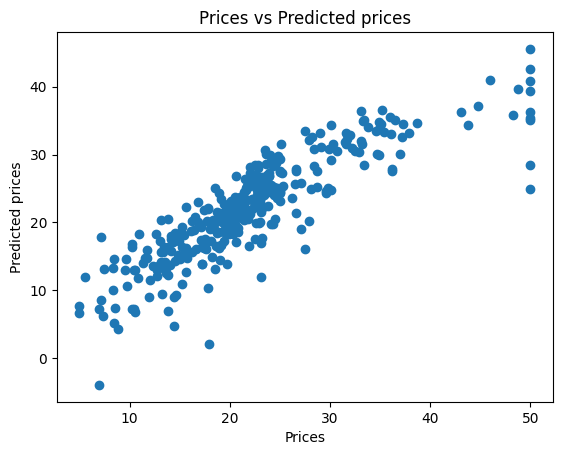

In [48]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

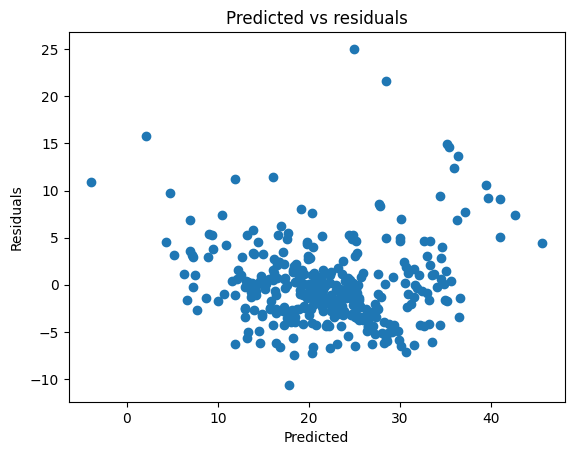

In [49]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

<ipython-input-50-c62ec83682b5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train-y_pred)


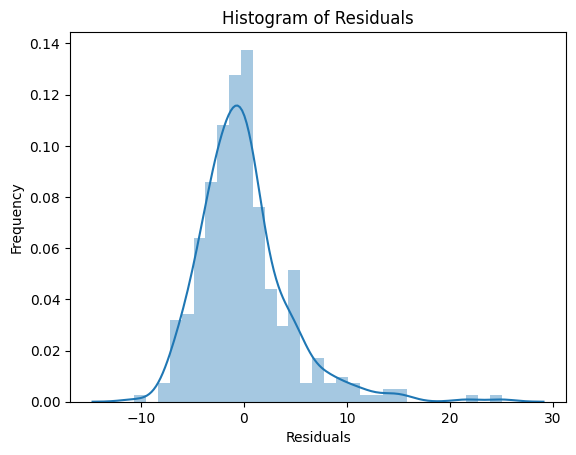

In [50]:
# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [51]:
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)

In [52]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7134033837044162
Adjusted R^2: 0.6841161382435537
MAE: 3.8549920587264106
MSE: 29.926439389320194
RMSE: 5.470506319283453
